In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import wrangle as w

np.random.seed(777)

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2271940,2.0,1.0,830.0,137426.0,1952.0,2133.42,6037.0
1148321,0.0,0.0,3740.0,336286.0,1928.0,4394.95,6037.0
92202,4.0,2.0,1374.0,299737.0,1964.0,4245.74,6037.0
2186232,2.0,2.0,1461.0,367201.0,1950.0,4531.38,6037.0
2491841,3.0,2.0,1518.0,82587.0,1958.0,1058.70,6037.0
...,...,...,...,...,...,...,...
2926266,4.0,2.0,1714.0,341373.0,1948.0,4173.59,6037.0
2823579,5.0,3.0,2922.0,1155675.0,1922.0,13680.74,6037.0
324215,4.0,2.0,1735.0,76266.0,1963.0,1379.26,6059.0
2181912,4.0,3.0,2624.0,809302.0,1964.0,10007.70,6037.0


In [4]:
#x_train, x_validate, x_test = train[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt','yearbuilt', 'taxamount']], validate[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt','yearbuilt', 'taxamount']], test[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt','yearbuilt', 'fips']]

In [5]:
#y_train, y_validate, y_test = train.taxamount, validate.taxamount, test.taxamount

In [6]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2271940,2.0,1.0,830.0,137426.0,1952.0,2133.42,6037.0
1148321,0.0,0.0,3740.0,336286.0,1928.0,4394.95,6037.0
92202,4.0,2.0,1374.0,299737.0,1964.0,4245.74,6037.0
2186232,2.0,2.0,1461.0,367201.0,1950.0,4531.38,6037.0
2491841,3.0,2.0,1518.0,82587.0,1958.0,1058.70,6037.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646467 entries, 2271940 to 157984
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1646465 non-null  float64
 1   bathroomcnt                   1646455 non-null  float64
 2   calculatedfinishedsquarefeet  1646467 non-null  float64
 3   taxvaluedollarcnt             1646467 non-null  float64
 4   yearbuilt                     1643903 non-null  float64
 5   taxamount                     1646467 non-null  float64
 6   fips                          1646467 non-null  float64
dtypes: float64(7)
memory usage: 100.5 MB


# Q1

In [8]:
scaled_train = train.copy()

In [9]:
scaler = MinMaxScaler()
scaled_train[['bedroomcnt_minmax', 'bathroomcnt_minmax', 'taxamount_minmax']] = scaler.fit_transform(train[['bedroomcnt', 'bathroomcnt', 'taxamount']])

scaler = StandardScaler()
scaled_train[['bedroomcnt_standard', 'bathroomcnt_standard', 'taxamount_standard']] = scaler.fit_transform(train[['bedroomcnt', 'bathroomcnt','taxamount']])

scaler = RobustScaler()
scaled_train[['bedroomcnt_robust', 'bathroomcnt_robust', 'taxamount_robust']] = scaler.fit_transform(train[['bedroomcnt', 'bathroomcnt', 'taxamount']])

In [10]:
scaled_train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,bedroomcnt_minmax,bathroomcnt_minmax,taxamount_minmax,bedroomcnt_standard,bathroomcnt_standard,taxamount_standard,bedroomcnt_robust,bathroomcnt_robust,taxamount_robust
2271940,2.0,1.0,830.0,137426.0,1952.0,2133.42,6037.0,0.08,0.032258,0.000616,-0.928416,-1.186759,-0.376066,-0.5,-1.0,-0.511988
1148321,0.0,0.0,3740.0,336286.0,1928.0,4394.95,6037.0,0.00,0.000000,0.001270,-2.560718,-2.138016,-0.116581,-1.5,-2.0,0.094624
92202,4.0,2.0,1374.0,299737.0,1964.0,4245.74,6037.0,0.16,0.064516,0.001227,0.703886,-0.235502,-0.133701,0.5,0.0,0.054601
2186232,2.0,2.0,1461.0,367201.0,1950.0,4531.38,6037.0,0.08,0.064516,0.001309,-0.928416,-0.235502,-0.100928,-0.5,0.0,0.131218
2491841,3.0,2.0,1518.0,82587.0,1958.0,1058.70,6037.0,0.12,0.064516,0.000305,-0.112265,-0.235502,-0.499378,0.0,0.0,-0.800261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926266,4.0,2.0,1714.0,341373.0,1948.0,4173.59,6037.0,0.16,0.064516,0.001206,0.703886,-0.235502,-0.141980,0.5,0.0,0.035248
2823579,5.0,3.0,2922.0,1155675.0,1922.0,13680.74,6037.0,0.20,0.096774,0.003955,1.520036,0.715756,0.948857,1.0,1.0,2.585357
324215,4.0,2.0,1735.0,76266.0,1963.0,1379.26,6059.0,0.16,0.064516,0.000398,0.703886,-0.235502,-0.462597,0.5,0.0,-0.714277
2181912,4.0,3.0,2624.0,809302.0,1964.0,10007.70,6037.0,0.16,0.096774,0.002893,0.703886,0.715756,0.527417,0.5,1.0,1.600135


Text(0.5, 1.0, 'Scaled')

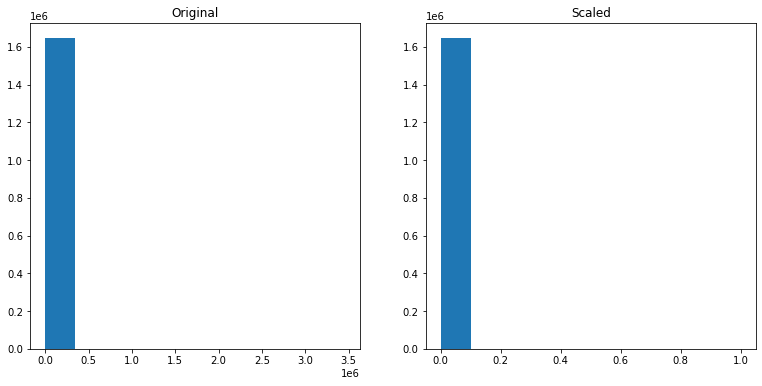

In [11]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['taxamount'])
plt.title('Original')
plt.subplot(122)
plt.hist(scaled_train['taxamount_minmax'])
plt.title('Scaled')

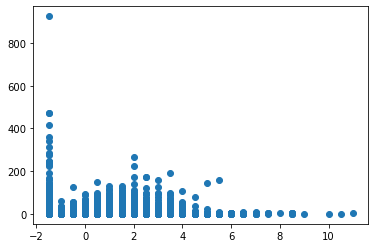

In [12]:
plt.scatter(scaled_train.bedroomcnt_robust, scaled_train.taxamount_robust)

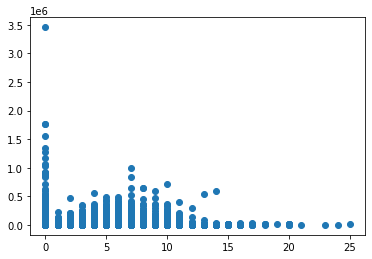

In [13]:
plt.scatter(scaled_train.bedroomcnt, scaled_train.taxamount)

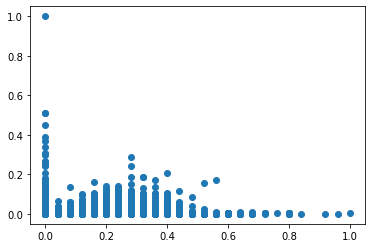

In [14]:
plt.scatter(scaled_train.bedroomcnt_minmax, scaled_train.taxamount_minmax)

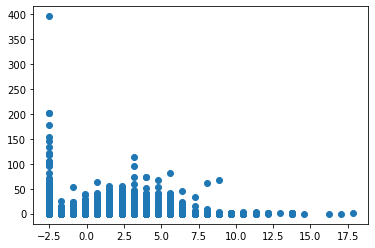

In [15]:
plt.scatter(scaled_train.bedroomcnt_standard, scaled_train.taxamount_standard)

# Q2

In [16]:
scaled_train[['bedroomcnt_minmax_inv', 'bathroomcnt_minmax_inv', 'taxamount_minmax_inv']] = scaler.inverse_transform(train[['bedroomcnt', 'bathroomcnt', 'taxamount']])

scaled_train[['bedroomcnt_standard_inv', 'bathroomcnt_standard_inv', 'taxamount_standard_inv']] = scaler.inverse_transform(train[['bedroomcnt', 'bathroomcnt', 'taxamount']])

scaled_train[['bedroomcnt_robust_inv', 'bathroomcnt_robust_inv', 'taxamount_robust_inv']] = scaler.inverse_transform(train[['bedroomcnt', 'bathroomcnt', 'taxamount']])

In [17]:
scaled_train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,bedroomcnt_minmax,bathroomcnt_minmax,taxamount_minmax,...,taxamount_robust,bedroomcnt_minmax_inv,bathroomcnt_minmax_inv,taxamount_minmax_inv,bedroomcnt_standard_inv,bathroomcnt_standard_inv,taxamount_standard_inv,bedroomcnt_robust_inv,bathroomcnt_robust_inv,taxamount_robust_inv
2271940,2.0,1.0,830.0,137426.0,1952.0,2133.42,6037.0,0.08,0.032258,0.000616,...,-0.511988,7.0,3.0,7.957720e+06,7.0,3.0,7.957720e+06,7.0,3.0,7.957720e+06
1148321,0.0,0.0,3740.0,336286.0,1928.0,4394.95,6037.0,0.00,0.000000,0.001270,...,0.094624,3.0,2.0,1.638901e+07,3.0,2.0,1.638901e+07,3.0,2.0,1.638901e+07
92202,4.0,2.0,1374.0,299737.0,1964.0,4245.74,6037.0,0.16,0.064516,0.001227,...,0.054601,11.0,4.0,1.583273e+07,11.0,4.0,1.583273e+07,11.0,4.0,1.583273e+07
2186232,2.0,2.0,1461.0,367201.0,1950.0,4531.38,6037.0,0.08,0.064516,0.001309,...,0.131218,7.0,4.0,1.689764e+07,7.0,4.0,1.689764e+07,7.0,4.0,1.689764e+07
2491841,3.0,2.0,1518.0,82587.0,1958.0,1058.70,6037.0,0.12,0.064516,0.000305,...,-0.800261,9.0,4.0,3.951019e+06,9.0,4.0,3.951019e+06,9.0,4.0,3.951019e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926266,4.0,2.0,1714.0,341373.0,1948.0,4173.59,6037.0,0.16,0.064516,0.001206,...,0.035248,11.0,4.0,1.556375e+07,11.0,4.0,1.556375e+07,11.0,4.0,1.556375e+07
2823579,5.0,3.0,2922.0,1155675.0,1922.0,13680.74,6037.0,0.20,0.096774,0.003955,...,2.585357,13.0,5.0,5.100769e+07,13.0,5.0,5.100769e+07,13.0,5.0,5.100769e+07
324215,4.0,2.0,1735.0,76266.0,1963.0,1379.26,6059.0,0.16,0.064516,0.000398,...,-0.714277,11.0,4.0,5.146110e+06,11.0,4.0,5.146110e+06,11.0,4.0,5.146110e+06
2181912,4.0,3.0,2624.0,809302.0,1964.0,10007.70,6037.0,0.16,0.096774,0.002893,...,1.600135,11.0,5.0,3.731410e+07,11.0,5.0,3.731410e+07,11.0,5.0,3.731410e+07


## The resulting data set is not the same

# Q3

In [24]:
scaler = QuantileTransformer(output_distribution='normal')
scaled_train[['bedroomcnt_quant', 'bathroomcnt_quant', 'taxamount_quant']] = scaler.fit_transform(train[['bedroomcnt', 'bathroomcnt', 'taxamount']])

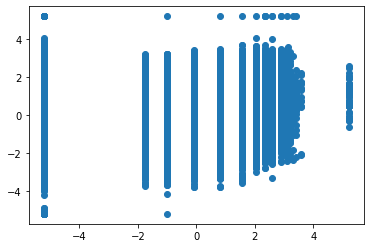

In [25]:
plt.scatter(scaled_train.bedroomcnt_quant, scaled_train.taxamount_quant)

# Q4

In [26]:
scaler = QuantileTransformer()
scaled_train[['bedroomcnt_quant', 'bathroomcnt_quant', 'taxamount_quant']] = scaler.fit_transform(train[['bedroomcnt', 'bathroomcnt', 'taxamount']])

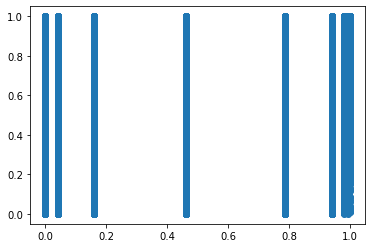

In [27]:
plt.scatter(scaled_train.bedroomcnt_quant, scaled_train.taxamount_quant)

# Q5

In [30]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxamount', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [31]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [32]:
scaler

MinMaxScaler()

In [33]:
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2271940,0.08,0.032258,0.001011,137426.0,1952.0,0.000616,6037.0
1148321,0.00,0.000000,0.004558,336286.0,1928.0,0.001270,6037.0
92202,0.16,0.064516,0.001674,299737.0,1964.0,0.001227,6037.0
2186232,0.08,0.064516,0.001780,367201.0,1950.0,0.001309,6037.0
2491841,0.12,0.064516,0.001849,82587.0,1958.0,0.000305,6037.0
...,...,...,...,...,...,...,...
2926266,0.16,0.064516,0.002088,341373.0,1948.0,0.001206,6037.0
2823579,0.20,0.096774,0.003561,1155675.0,1922.0,0.003955,6037.0
324215,0.16,0.064516,0.002114,76266.0,1963.0,0.000398,6059.0
2181912,0.16,0.096774,0.003198,809302.0,1964.0,0.002893,6037.0
